# import libraries

In [90]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# 1. Problem Statement

# 2. Data Gathering

In [4]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
df.axes

[RangeIndex(start=0, stop=150, step=1),
 Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
        'Species'],
       dtype='object')]

In [10]:
df.shape

(150, 6)

In [12]:
column_count = df.shape[1]
row_count = df.shape[0]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# 3. Exploratory Data Analysis

### 3.1 id variable

In [17]:
df['Id'].nunique()

150

In [18]:
df.drop('Id',axis = 1,inplace = True)

###  3.4 :  Species

In [21]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [22]:
df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2},inplace = True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [30]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalLengthCm'>

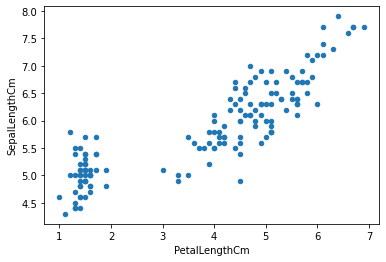

In [32]:
df.plot(x = 'PetalLengthCm', y = 'SepalLengthCm',kind = 'scatter')

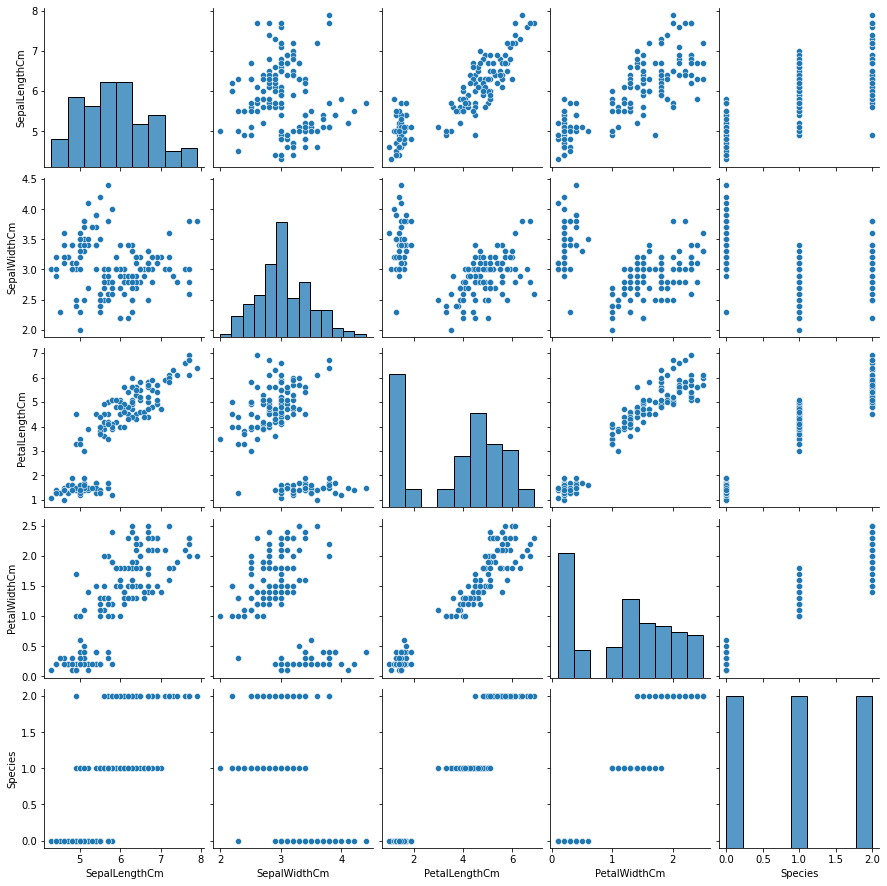

In [27]:
sns.pairplot(df)

In [34]:
corr = df.corr()

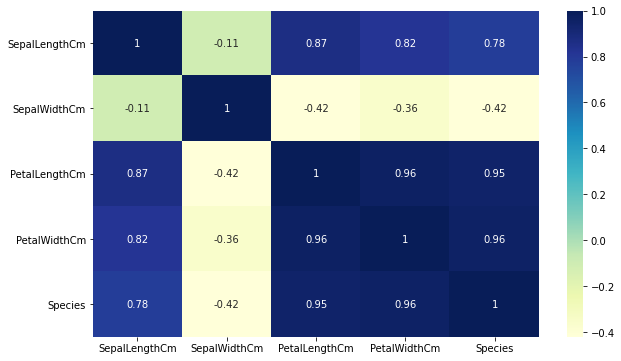

In [41]:
plt.figure(figsize= (10,6))
sns.heatmap(corr,annot = True, cmap = 'YlGnBu')
plt.savefig('Correlation_matrix.jpg')

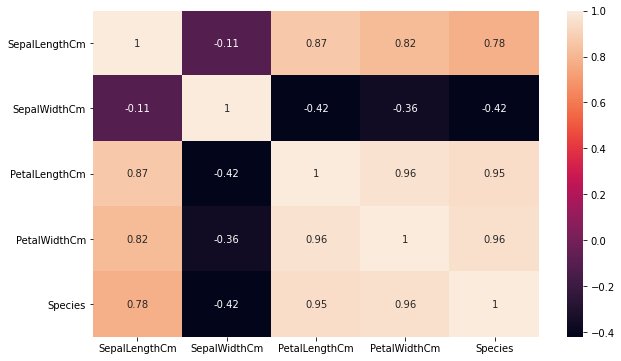

In [42]:
plt.figure(figsize= (10,6))
sns.heatmap(corr,annot = True)
plt.savefig('Correlation_matrix1.jpg')

# 4. Feature Engineering

# 5. Feature Selection

In [44]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [48]:
x = df.drop('SepalLengthCm',axis = 1) # 2D
y = df['SepalLengthCm']   # 1D
y

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 150, dtype: float64

# 6. Model Building/Training

### 6.1 splitting dataset into train and test

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=1)
x_train

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
91,3.0,4.6,1.4,1
135,3.0,6.1,2.3,2
69,2.5,3.9,1.1,1
128,2.8,5.6,2.1,2
114,2.8,5.1,2.4,2
...,...,...,...,...
133,2.8,5.1,1.5,2
137,3.1,5.5,1.8,2
72,2.5,4.9,1.5,1
140,3.1,5.6,2.4,2


## 6.2 Create an instance of model


In [78]:
lr_model = LinearRegression()

## 6.3 Model Training

In [81]:
lr_model.fit(x_train, y_train)  # Used to train the models

LinearRegression()

# 7. Model Evaluation

In [86]:
y_pred = lr_model.predict(x_test)
y_pred[0:5]

array([5.09192877, 4.93149358, 6.25720518, 5.02467945, 7.72619147])

In [91]:
y_test[:5]  # Actual y values

14     5.8
98     5.1
75     6.6
16     5.4
131    7.9
Name: SepalLengthCm, dtype: float64

### 7.1 residual

In [92]:
residual = y_test - y_pred
# residual

### 7.2 MSE

In [94]:
mse = mean_squared_error(y_test,y_pred)
print("MSE is :",mse)

MSE is : 0.15781531046414635


### 7.3 RMSE

In [98]:
rmse = np.sqrt(mse)
print("RMSE is :",rmse)

RMSE is : 0.39725975188048734


### 7.4 R2 Value

In [100]:
r2_value = r2_score(y_test,y_pred)
r2_value

0.7588110183264588

In [102]:
lr_model.score(x_train,y_train)

0.8816124649726118

In [104]:
lr_model.score(x_test,y_test)

0.7588110183264588

### 7.5 Adjusted R2 value

In [105]:
Adjusted_R2 = 1 - (1 - r2_value) * (x.shape[0] - 1) / (x.shape[0] - x.shape[1] - 1)
Adjusted_R2

0.7521575291768439

### 7.5 MAE

In [97]:
mae = mean_absolute_error(y_test,y_pred)
mae

0.32327812415709106